In [416]:

import pandas as pd
import numpy as np
import scipy as sp

# Standard plotly imports
import plotly
import plotly.plotly as py
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns


plotly.tools.set_credentials_file(username='mvasilenko', api_key='ALDtLKCwazv6wy96YJm4')

## All happy countries are alike. All unhappy countries are unhappy in their own way. Visualizing World Happiness Report data

This project is aimed at visualizing core relationships between happiness and socio-economic indicators, based on data from the World Happiness Report 2019[https://worldhappiness.report/ed/2019/]. This report is part of the initiative run by the United Nations Sustainable Development Solutions Network and represents the results of the survey of the state of global happiness. The whole report covers data across 156 countries during the 10 years time span. I focus on the latest data for 2018, which includes happiness scores and economic indicators for 136 countries.


The happiness score is the national average response to the question of life evaluations: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” Happiness score is also known as subjective well-being, or life ladder. Other data included into analysis are GDP per capita, healthy life expectancy at birth, freedom to make life choices, generosity, and perception of corruption.


For the long time GDP per capita has been the major indicator used by economists to measure an economy’s well-being and performance. However, this indicator per se doesn’t reflect people’s wellbeing. In the recent years more and more economic research is focusing on revisiting the approach to measuring countries’ welfare and including behavioral data into account. 


__The goal of my project is to find and visualize different relationships between the happiness (measure by happiness score) and socio-economic indicators.__



In [80]:
# Read the time series data on happiness
happy_time = pd.read_csv("happiness_time.csv")

In [417]:
happy_time.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
# Get country codes
whr_codes = pd.read_csv('whr_countries_codes.csv', header=None)

In [153]:
whr_codes.columns = ['country', 'code']

In [81]:
# Take data from 2018 only
happy_time_2018 = happy_time[happy_time['Year']==2018]

In [157]:
# Merge with country codes
happy_2018 = happy_time_2018.merge(whr_codes, left_on='Country name', right_on='country', how= 'left')

In [171]:
# Choropleth map with happiness score by country
data = [go.Choropleth(
    locations = happy_2018['code'],
    z = happy_2018['Life Ladder'], # happiness score
    text = happy_2018['country'],
    colorscale = [[0.0, 'rgb(165,0,38)'], 
                  [0.1111111111111111, 'rgb(215,48,39)'],
                  [0.2222222222222222, 'rgb(244,109,67)'], 
                  [0.3333333333333333, 'rgb(253,174,97)'],
                  [0.4444444444444444, 'rgb(254,224,144)'], 
                  [0.5555555555555556, 'rgb(224,243,248)'],
                  [0.6666666666666666, 'rgb(171,217,233)'], 
                  [0.7777777777777778, 'rgb(116,173,209)'],
                  [0.8888888888888888, 'rgb(69,117,180)'],
                  [1.0, 'rgb(49,54,149)']],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Happiness score'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'World Happiness Score 2018'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    ),
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="https://worldhappiness.report/ed/2019/">\
           World Happiness Report 2019</a>',
        showarrow = False
    )]
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-world-map')

/anaconda3/envs/data_viz/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



The map above shows 2018  happiness scores across 136 countries. I chose the color scale in such a way as to distinguish between the happier (red spectrum of colors), unhappier (blue spectrum) countries, and moderately happy countries (yellow score). The happiest country in 2018 was Finland, followed by other Scandinavian countries. In general, Northern and Western European countries, North American countries, and Australia tend to report highest levels of happiness score. On the first sight, developed countries tend to be “happier” then developing countries.


In [173]:
# Save offline interactive chart in html
plotly.offline.plot(fig, filename='happiness_2018_map.html')


'file:///Users/mariavasilenko/USF/data_viz/fiinal_project/happiness_2018_map.html'

In [174]:
# Save onliune interactive chart
py.plot(data, filename = 'happiness_2018', auto_open=True)


'https://plot.ly/~mvasilenko/13'

### Exploratory data Analysis

In these section we will visualize core statistical relationships and characteristics of data at hand


In [418]:
# Histogram of happiness score
happy_2018['Life Ladder'].iplot(
    kind='hist',
    bins=30,
    xTitle='Happiness Score',
    linecolor='black',
    yTitle='Counts',
    title='Happiness Score 2018 Distribution')

Let's take a look at happiness score key statistics by region

In [364]:
country_groups = pd.read_csv('country_groups.csv')

country_groups.head()

happy_2018_groups = happy_2018.merge(country_groups[['Country Name', 'Code', 'Income Group', 'Region']], left_on='code', right_on='Code', how= 'left')

happy_2018_groups[happy_2018_groups['Region'].isnull()]

# Replace NaNs manually
happy_2018_groups.loc[happy_2018_groups['Country name'].str.startswith('Guinea'),['Region']]="Sub-Saharan Africa"

#df.loc[df[<some_column_name>] == <condition>, [<another_columnname>]] = <value_to_add>

happy_2018_groups.loc[happy_2018_groups['Country name'].str.startswith('Kosovo'),['Region']]="Europe & Central Asia"
happy_2018_groups.loc[happy_2018_groups['Country name'].str.startswith('Montenegro'),['Region']]="Europe & Central Asia"
happy_2018_groups.loc[happy_2018_groups['Country name'].str.startswith('Serbia'),['Region']]="Europe & Central Asia"
happy_2018_groups.loc[happy_2018_groups['Country name'].str.startswith('Romania'),['Region']]="Europe & Central Asia"
happy_2018_groups.loc[happy_2018_groups['Country name'].str.startswith('Palestinian Territories'),['Region']]="Middle East & North Africa"
happy_2018_groups.loc[happy_2018_groups['Country name'].str.startswith('Taiwan Province of China'),['Region']]="East Asia & Pacific"





happy_2018_groups[happy_2018_groups['Region'].isnull()]

happy_2018_groups['Region'].value_counts()

by_region = happy_2018_groups.pivot(columns='Region', values='Life Ladder')

by_region.rename({'East Asia & Pacific':'E.Asia & Pacific', 'Europe & Central Asia':'Europe & Centr. Asia',\
                  'Latin America & Caribbean':'Latin America', 'Middle East & North Africa':'Middle East & N. Africa', \
                   'Sub-Saharan Africa ':'Sub-Sahar. Africa'}, axis='columns', inplace=True)

#by_region.head()

In [442]:

by_region.iplot(
        kind='box', colorscale='set2',
        showlegend=False,
        
        yTitle='Happiness Score',
        title='Box Plot of Happiness Score by Region',
)

As we can see from the plot the happiest nations are mostly in Europe and North America. The biggest variation in happiness scores is within Middle East and North Africa region

Now let's explore how __the happiness score changed over a decade for top-10 happiest and top-10 unhappiest countries__

In [519]:
happy_time.groupby('Year')[['Life Ladder','Log GDP per capita']].agg(['mean', 'count'])

Life Ladder       Log GDP per capita      
            mean count               mean count
Year                                           
2005    6.446164    27          10.042106    27
2006    5.196935    89           8.937858    89
2007    5.418291   102           9.050024   102
2008    5.418554   110           9.050603   110
2009    5.457640   114           9.151069   113
2010    5.496782   124           9.273322   123
2011    5.424088   146           9.181970   145
2012    5.443751   142           9.286648   140
2013    5.394568   137           9.264351   136
2014    5.389023   145           9.251297   143
2015    5.404037   143           9.276450   139
2016    5.399414   142           9.270448   139
2017    5.460421   147           9.298247   143
2018    5.502134   136           9.250394   127

In [193]:
# Top 10 happiest countries in 2018
top_10_happiest = happy_time_2018.sort_values(by = 'Life Ladder',ascending=False).head(10)
top_10_happiest

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
495,Finland,2018,7.858107,10.636060,0.962155,71.900002,0.937807,-0.131735,0.198605,0.781546,...,NaN,0.275615,0.362294,NaN,0.571719,NaN,0.479230,NaN,0.580379,NaN
409,Denmark,2018,7.648786,10.755594,0.958219,72.400002,0.935438,0.015593,0.150607,0.821423,...,NaN,0.267000,0.479051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,Switzerland,2018,7.508587,10.975945,0.930291,74.099998,0.926415,0.096369,0.301260,0.792226,...,NaN,0.328100,0.320725,NaN,NaN,0.265255,0.378479,NaN,0.518936,NaN
1076,Netherlands,2018,7.463097,10.809204,0.939443,72.300003,0.919985,0.155536,0.370558,0.861977,...,NaN,0.286333,0.467998,NaN,NaN,NaN,NaN,NaN,0.435723,0.661757
1139,Norway,2018,7.444262,11.085626,0.965962,73.199997,0.960429,0.075728,0.268201,0.827414,...,NaN,0.272231,0.336649,NaN,NaN,NaN,0.647737,NaN,0.737305,NaN
81,Austria,2018,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,...,NaN,0.302692,0.299504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,Sweden,2018,7.374792,10.766932,0.930680,72.599998,0.941725,0.069573,0.262797,0.822676,...,NaN,0.274154,0.381510,NaN,0.570790,NaN,0.565907,0.637185,0.679728,0.607827
1088,New Zealand,2018,7.370286,10.501477,0.953863,73.199997,0.949300,0.116750,0.206580,0.845363,...,NaN,NaN,0.388641,NaN,NaN,NaN,0.483871,NaN,0.511602,0.562273
895,Luxembourg,2018,7.242631,11.453928,0.902192,72.599998,0.883930,-0.025496,0.385146,0.750309,...,NaN,0.316077,0.326442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,United Kingdom,2018,7.233445,10.596948,0.928484,72.300003,0.837508,0.221998,0.404276,0.783172,...,NaN,0.341083,0.417473,NaN,NaN,NaN,0.304498,NaN,0.300558,NaN


In [194]:
# Top 10 unhappiest countries in 2018
top_10_unhappiest = happy_time_2018.sort_values(by = 'Life Ladder',ascending=True).head(10)
top_10_unhappiest

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
10,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,...,NaN,NaN,0.290681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1678,Yemen,2018,3.057514,NaN,0.789422,56.700001,0.552726,NaN,0.792587,0.461114,...,NaN,0.357000,0.448597,NaN,NaN,NaN,NaN,NaN,NaN,0.385000
927,Malawi,2018,3.334634,7.005932,0.527843,57.599998,0.798915,0.065061,0.765964,0.586300,...,NaN,0.427000,0.702330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,Tanzania,2018,3.445023,7.928911,0.675330,57.500000,0.807142,0.141757,0.611534,0.762089,...,NaN,0.384667,0.568629,NaN,NaN,NaN,NaN,0.078125,NaN,NaN
191,Botswana,2018,3.461366,9.680226,0.794936,58.900002,0.817621,-0.259084,0.806945,0.729643,...,NaN,0.626000,0.616160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280,Rwanda,2018,3.561047,7.567531,0.616173,61.099998,0.924232,0.057108,0.163810,0.793368,...,NaN,0.482000,0.647506,NaN,NaN,NaN,NaN,NaN,0.048570,0.166339
601,Haiti,2018,3.614928,7.416092,0.537976,55.700001,0.591468,0.420986,0.720445,0.584113,...,NaN,0.411000,0.669434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703,Zimbabwe,2018,3.616480,7.553395,0.775388,55.599998,0.762675,-0.038384,0.844209,0.710119,...,NaN,0.432000,0.541772,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
231,Burundi,2018,3.775283,6.541033,0.484715,53.400002,0.646399,-0.019334,0.598608,0.666442,...,NaN,0.360000,0.680813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,India,2018,3.818069,8.830280,0.638052,60.099998,0.890443,0.071806,0.805263,0.657287,...,NaN,0.351000,0.428206,NaN,NaN,0.3352,0.328431,0.388611,0.206897,0.321496


In [197]:
unhappiest_2018_countries = list(top_10_unhappiest['Country name'])

In [213]:
happiest_2018_countries = list(top_10_happiest['Country name'])

In [ ]:
## Tracking the change over a decade

Switzerland has numbers for 2006 and 2009. 'Luxembourg' - for 2009

In [226]:
happiest_2018_past = happy_time[(happy_time['Country name'].isin(happiest_2018_countries)) & (happy_time['Year']==2008) ]
happiest_2018_past


,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
72,Austria,2008,7.180954,10.701936,0.934593,71.080002,0.879069,0.289452,0.613625,0.832170,...,0.304,0.302692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,Denmark,2008,7.970892,10.733475,0.953912,70.080002,0.969788,0.267413,0.247505,0.756866,...,0.252,0.267000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,Finland,2008,7.670627,10.659014,0.951340,70.080002,0.934179,0.022528,0.216568,0.772778,...,0.278,0.275615,NaN,NaN,0.571719,NaN,0.479230,NaN,0.580379,NaN
1067,Netherlands,2008,7.631012,10.760756,0.944202,71.000000,0.883287,0.359816,0.418940,0.788195,...,0.293,0.286333,NaN,NaN,NaN,NaN,NaN,NaN,0.435723,0.661757
1079,New Zealand,2008,7.381171,10.369769,0.944275,71.599998,0.893072,0.294975,0.333751,0.854247,...,NaN,NaN,NaN,NaN,NaN,NaN,0.483871,NaN,0.511602,0.562273
1133,Norway,2008,7.632288,11.075756,0.935879,71.559998,0.947289,-0.000819,0.502776,0.791722,...,0.270,0.272231,NaN,NaN,NaN,NaN,0.647737,NaN,0.737305,NaN
1434,Sweden,2008,7.515997,10.679737,0.923092,71.620003,0.911609,0.118379,0.313961,0.804467,...,0.281,0.274154,NaN,NaN,0.570790,NaN,0.565907,0.637185,0.679728,0.607827
1593,United Kingdom,2008,6.986464,10.542795,0.953839,70.739998,0.759144,0.326979,0.547769,0.818951,...,0.341,0.341083,NaN,NaN,NaN,NaN,0.304498,NaN,0.300558,NaN


In [228]:
happiest_2018_past = happiest_2018_past.append(happy_time[(happy_time['Country name'].isin(['Luxembourg','Switzerland'])) & (happy_time['Year']==2009)])
happiest_2018_past

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
72,Austria,2008,7.180954,10.701936,0.934593,71.080002,0.879069,0.289452,0.613625,0.832170,...,0.304,0.302692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,Denmark,2008,7.970892,10.733475,0.953912,70.080002,0.969788,0.267413,0.247505,0.756866,...,0.252,0.267000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,Finland,2008,7.670627,10.659014,0.951340,70.080002,0.934179,0.022528,0.216568,0.772778,...,0.278,0.275615,NaN,NaN,0.571719,NaN,0.479230,NaN,0.580379,NaN
1067,Netherlands,2008,7.631012,10.760756,0.944202,71.000000,0.883287,0.359816,0.418940,0.788195,...,0.293,0.286333,NaN,NaN,NaN,NaN,NaN,NaN,0.435723,0.661757
1079,New Zealand,2008,7.381171,10.369769,0.944275,71.599998,0.893072,0.294975,0.333751,0.854247,...,NaN,NaN,NaN,NaN,NaN,NaN,0.483871,NaN,0.511602,0.562273
1133,Norway,2008,7.632288,11.075756,0.935879,71.559998,0.947289,-0.000819,0.502776,0.791722,...,0.270,0.272231,NaN,NaN,NaN,NaN,0.647737,NaN,0.737305,NaN
1434,Sweden,2008,7.515997,10.679737,0.923092,71.620003,0.911609,0.118379,0.313961,0.804467,...,0.281,0.274154,NaN,NaN,0.570790,NaN,0.565907,0.637185,0.679728,0.607827
1593,United Kingdom,2008,6.986464,10.542795,0.953839,70.739998,0.759144,0.326979,0.547769,0.818951,...,0.341,0.341083,NaN,NaN,NaN,NaN,0.304498,NaN,0.300558,NaN
886,Luxembourg,2009,6.957920,11.397500,0.938559,71.440002,0.939102,0.121556,0.431607,0.799493,...,0.312,0.316077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1446,Switzerland,2009,7.524521,10.911548,0.938339,72.260002,0.891277,0.119585,0.342427,0.814037,...,0.329,0.328100,0.322344,0.452701,NaN,0.265255,0.378479,NaN,0.518936,NaN


In [281]:
# Combine happiest 2018 and happiest 2018  in past
happiest_trend = top_10_happiest[['Country name','Year', 'Life Ladder']].merge(happiest_2018_past[['Country name','Year', 'Life Ladder']], 
                                                              left_on = 'Country name', right_on = 'Country name',
                                                              how = 'left')

happiest_trend
happiest_trend.rename(columns = {'Year_x':'year_2018', 'Life Ladder_x':'happiness_score_2018', 
                      'Year_y':'past', 'Life Ladder_y':'happiness_score_past'},inplace=True)                                                              
                                                               
                                                               

In [520]:
# Find the change of happiness score over a decade
happiest_trend['change'] = happiest_trend['happiness_score_2018'] - happiest_trend['happiness_score_past']


In [296]:
happiest_trend = happiest_trend.replace('New Zealand', 'NZ')
happiest_trend = happiest_trend.replace('United Kingdom', 'UK')
happiest_trend = happiest_trend.replace('Netherlands', 'Holland')

happiest_trend[happiest_trend['Country name']=='United Kingdom']['Country name'] = 'UK'
happiest_trend[happiest_trend['Country name']=='Netherlands']['Country name'] = 'Holland'

In [246]:
# Unhappiest countries trend
unhappiest_2018_past = happy_time[(happy_time['Country name'].isin(unhappiest_2018_countries)) & (happy_time['Year']==2008) ]
unhappiest_2018_past = unhappiest_2018_past.append(happy_time[(happy_time['Country name'].isin(['Yemen', 'Malawi'])) & (happy_time['Year']==2007)])

unhappiest_trend = top_10_unhappiest[['Country name','Year', 'Life Ladder']].merge(unhappiest_2018_past[['Country name','Year', 'Life Ladder']], 
                                                              left_on = 'Country name', right_on = 'Country name',
                                                              how = 'left')


unhappiest_trend.rename(columns = {'Year_x':'year_2018', 'Life Ladder_x':'happiness_score_2018', 
                      'Year_y':'past', 'Life Ladder_y':'happiness_score_past'},inplace=True)     


unhappiest_trend['change'] = unhappiest_trend['happiness_score_2018'] - unhappiest_trend['happiness_score_past']

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Botswana,2008,5.451147,9.530127,0.831905,49.860001,0.857776,-0.171547,0.806226,0.731180,...,NaN,0.626000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Burundi,2008,3.563228,6.632450,0.290934,49.020000,0.260069,-0.015204,0.859814,0.439698,...,NaN,0.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,Haiti,2008,3.846329,7.370657,0.679098,40.380001,0.464971,0.259505,0.811659,0.607697,...,NaN,0.411000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,India,2008,5.145833,8.239232,0.683593,56.560001,0.755840,-0.080736,0.891188,0.674160,...,NaN,0.351000,NaN,NaN,NaN,0.3352,0.328431,0.388611,0.206897,0.321496
1271,Rwanda,2008,4.362989,7.141650,0.485681,53.040001,0.752293,0.020283,0.286407,0.642954,...,NaN,0.482000,NaN,NaN,NaN,NaN,NaN,NaN,0.048570,0.166339
1485,Tanzania,2008,4.384742,7.594338,0.774360,50.500000,0.562212,0.247164,0.930032,0.744346,...,NaN,0.384667,NaN,NaN,NaN,NaN,NaN,0.078125,NaN,NaN
1693,Zimbabwe,2008,3.174264,7.102516,0.843475,44.139999,0.343556,-0.068002,0.963846,0.630983,...,NaN,0.432000,NaN,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
918,Malawi,2007,4.891037,6.811587,0.600267,46.259998,0.909994,0.194080,0.691305,0.727482,...,NaN,0.427000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,Yemen,2007,4.477133,8.340983,0.824969,53.400002,0.672685,-0.005798,NaN,0.591898,...,NaN,0.357000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385000


In [267]:
unhappiest_trend = unhappiest_trend.sort_values(by = 'happiness_score_2018', ascending = True)
unhappiest_trend

,Country name,year_2018,happiness_score_2018,past,happiness_score_past,change
0,Afghanistan,2018,2.694303,2008,3.723590,-1.029287
1,Yemen,2018,3.057514,2007,4.477133,-1.419619
2,Malawi,2018,3.334634,2007,4.891037,-1.556403
3,Tanzania,2018,3.445023,2008,4.384742,-0.939718
4,Botswana,2018,3.461366,2008,5.451147,-1.989781
5,Rwanda,2018,3.561047,2008,4.362989,-0.801942
6,Haiti,2018,3.614928,2008,3.846329,-0.231401
7,Zimbabwe,2018,3.616480,2008,3.174264,0.442216
8,Burundi,2018,3.775283,2008,3.563228,0.212055
9,India,2018,3.818069,2008,5.145833,-1.327764


In [342]:
trace1 = go.Bar(
    x=happiest_trend['Country name'],
    y=happiest_trend['happiness_score_2018'],
    marker = dict(color = 'rgb(229, 152, 102)'),
    name='2018 happiness score',
    
            )
trace2 = go.Bar(
    x=happiest_trend['Country name'],
    y=happiest_trend['change'],
     marker = dict(color = 'rgb(178, 186, 187)'),
    name='Change in score over a decade'
                )

trace3 = go.Bar(
    x=unhappiest_trend['Country name'],
    y=unhappiest_trend['happiness_score_2018'],
    marker = dict(color = 'rgb(133, 193, 233)'),
     name='2018 happiness score',
                    )
trace4 = go.Bar(
    x=unhappiest_trend['Country name'],
    y=unhappiest_trend['change'],
    marker = dict(color = 'rgb(178, 186, 187)'),
    showlegend=False
        )

data_happy = [trace1, trace2]
data_unhappy = [trace3, trace4]

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Top 10 happiest countries in 2018', 'Top 10 unhappiest countries in 2018',
                                                          ))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)



fig['layout'].update(height=800, width=1000, title='Unhappiest countries got unhappier over a decade, while happiest countries remained pretty happy')
fig['layout']['yaxis1'].update(range=[-2, 8])
fig['layout']['yaxis2'].update(range=[-2, 8])
#fig['layout'].update('rgba(245, 246, 249, 1)')
    #paper_bgcolor='rgba(245, 246, 249, 1)',
    #plot_bgcolor='rgba(245, 246, 249, 1)'
                    
#fig['layout'].update(paper_bgcolor = 'rgba(245, 246, 249, 1)')

'''layout = go.Layout(
    xaxis=dict(tickangle=0),
    barmode='group',
    paper_bgcolor='rgba(245, 246, 249, 1)',
    plot_bgcolor='rgba(245, 246, 249, 1)',
    yaxis=dict(
        range=[-2, 8])
)
'''
#fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



/anaconda3/envs/data_viz/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [341]:
# Save offline interactive chart in html
plotly.offline.plot(fig, filename='happiness_change.html')


'file:///Users/mariavasilenko/USF/data_viz/fiinal_project/happiness_change.html'

In [344]:
# Save onliune interactive chart
py.plot(fig, filename = 'happiness_change', auto_open=True)


'https://plot.ly/~mvasilenko/21'

In [361]:
#### INSERT CHART FROM TABLEAU

Let's take a look at correlations between the happiness score and key socio-ecomnomic indicators

In [471]:
stats = happy_2018_groups[['Country name', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government']].copy()

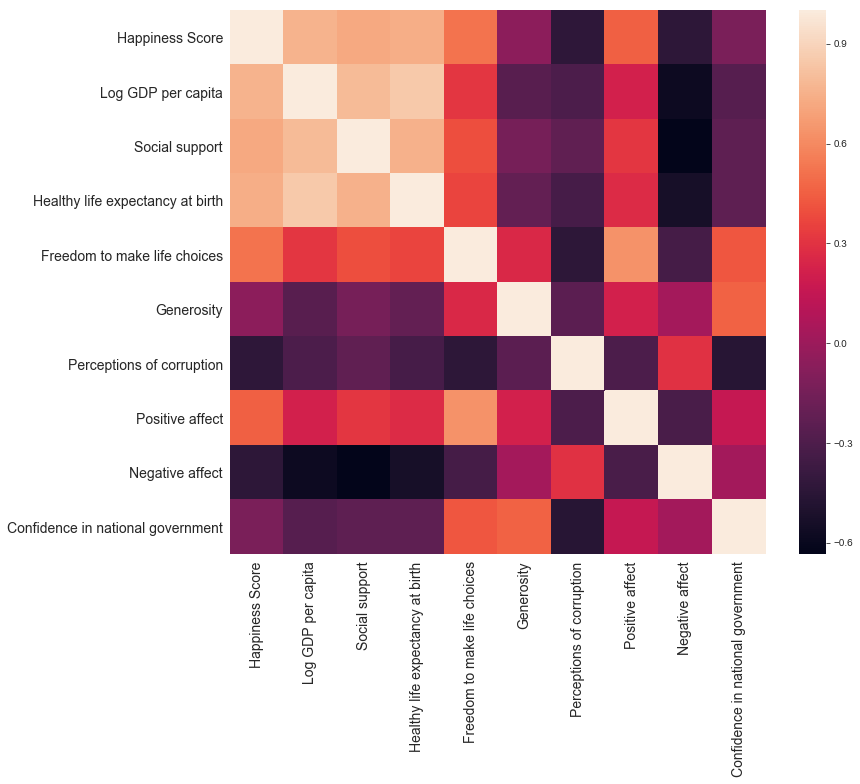

In [475]:
## Heatmap
plt.rcParams['figure.figsize']=(12,10)
score_corr = stats.corr()
# Make a heatmap object
htmp = sns.heatmap(score_corr)
#Change labels
labels = [item.get_text() for item in htmp.get_xticklabels()]
labels[0] = 'Happiness Score'
htmp.set_xticklabels(labels)
htmp.set_yticklabels(labels)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Now, let's take a look on how income inequlity is related to the perception of happiness (the bubble map below is generated using Tableau software):

<img src="gini_happy_.jpg">


In general, the less the income ineulaity, the happier people feel.

Now, let's visualize the relationship between the wealth of a country (GDP in USD) and happiness score (the tree map is generated using the Tableau software).

<img src="tree_map_2.jpg">

While charts above clearly show that money can buy some happiness, yet it's not the end of the story. As the chart below shows, in general, those who live longer lives and have someone to count on in times of trouble, tend to report higher levels of happiness.

In [526]:

data = [
    go.Scatter(
        x=happy_2018['Healthy life expectancy at birth'],
        y=happy_2018['Life Ladder'],
        text=happy_2018['Country name'],
        mode='markers',
        marker=dict(
            colorscale='Electric' ,
            showscale=True,
            size = happy_2018['Social support'],
            sizemin=10,
            color=happy_2018['Social support']))]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        yaxis=dict(title='Happiness Score'),
        xaxis=dict(title='Healthy life expectancy at birth'),
        title='Living longer lives and having someone to rely on (see colorscale) is strongly associated with happier lives'
    ))

iplot(figure)


Furthermore, one more important factor that contributes to overall happiness and feeling good is the ability to make life choices freely.

In [527]:
# Scatterplot with multiple variables

data = [
    go.Scatter(
        y=happy_2018['Positive affect'],
        x=happy_2018['Freedom to make life choices'],
        text=happy_2018['Country name'],
        mode='markers',
        marker=dict(
            colorscale='Electric' ,
            showscale=True,
            size = happy_2018['Life Ladder'],
            sizemin=10,
            color=happy_2018['Life Ladder']))]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        yaxis=dict(title='Positive mood'),
        xaxis=dict(title='Freedom to make life choices'),
        title='Freedom of choice is the key to happiness and good mood (in color) '
    ))

iplot(figure)
